# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
weather_data="C:/Users/veyce/Downloads/bootcamp_lessons/nu-chi-data-pt-02-2020-u-c/Homework/06-Python-APIs/Instructions/output_data/weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [62]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [63]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
city_name=[]
query_url = f"{url}appid={weather_api_key}&units={units}&q="
i=0
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval \n---------------------")
for city in cities:
    response = requests.get(query_url+city).json()
    if i+1==50:
        i=1
    else:
        i=i+1
    try:
        city_name.append(response["name"])
        city_name.append(city)
        print(f"Processing Record {i} of Set 1 |{city}")
    except:
        print(f"City not found")
    pass
print('---------------------\nData Retrieval complete')

Beginning Data Retrieval 
---------------------
Processing Record 1 of Set 1 |puerto el triunfo
Processing Record 2 of Set 1 |atuona
Processing Record 3 of Set 1 |vaini
Processing Record 4 of Set 1 |hermanus
Processing Record 5 of Set 1 |filadelfia
Processing Record 6 of Set 1 |madimba
Processing Record 7 of Set 1 |east london
Processing Record 8 of Set 1 |copiapo
Processing Record 9 of Set 1 |basco
Processing Record 10 of Set 1 |atar
Processing Record 11 of Set 1 |san rafael
Processing Record 12 of Set 1 |hobart
Processing Record 13 of Set 1 |qaanaaq
Processing Record 14 of Set 1 |hamilton
Processing Record 15 of Set 1 |punta arenas
Processing Record 16 of Set 1 |deputatskiy
City not found
Processing Record 18 of Set 1 |meiganga
Processing Record 19 of Set 1 |rettikhovka
Processing Record 20 of Set 1 |talnakh
Processing Record 21 of Set 1 |ponta do sol
Processing Record 22 of Set 1 |jalu
Processing Record 23 of Set 1 |codrington
Processing Record 24 of Set 1 |kashi
Processing Record 2

Processing Record 20 of Set 1 |yambio
Processing Record 21 of Set 1 |bandarbeyla
Processing Record 22 of Set 1 |tazmalt
Processing Record 23 of Set 1 |antalaha
Processing Record 24 of Set 1 |privas
Processing Record 25 of Set 1 |ulaangom
Processing Record 26 of Set 1 |te anau
Processing Record 27 of Set 1 |opuwo
Processing Record 28 of Set 1 |peleduy
Processing Record 29 of Set 1 |the valley
Processing Record 30 of Set 1 |itaituba
Processing Record 31 of Set 1 |tres arroyos
Processing Record 32 of Set 1 |alofi
Processing Record 33 of Set 1 |vila franca do campo
Processing Record 34 of Set 1 |georgetown
Processing Record 35 of Set 1 |zlobin
Processing Record 36 of Set 1 |fairbanks
Processing Record 37 of Set 1 |dunedin
Processing Record 38 of Set 1 |margate
Processing Record 39 of Set 1 |yatou
Processing Record 40 of Set 1 |te kauwhata
Processing Record 41 of Set 1 |grand gaube
Processing Record 42 of Set 1 |cao bang
Processing Record 43 of Set 1 |yulara
Processing Record 44 of Set 1 |u

Processing Record 40 of Set 1 |lahat
Processing Record 41 of Set 1 |bauchi
Processing Record 42 of Set 1 |airai
Processing Record 43 of Set 1 |kasongo-lunda
Processing Record 44 of Set 1 |krasnoselkup
Processing Record 45 of Set 1 |manicaragua
Processing Record 46 of Set 1 |plouzane
Processing Record 47 of Set 1 |mogadishu
City not found
Processing Record 49 of Set 1 |tiznit
City not found
Processing Record 2 of Set 1 |diego de almagro
Processing Record 3 of Set 1 |el paso
Processing Record 4 of Set 1 |boueni
Processing Record 5 of Set 1 |saint-augustin
Processing Record 6 of Set 1 |amapa
City not found
Processing Record 8 of Set 1 |kashary
Processing Record 9 of Set 1 |cap malheureux
Processing Record 10 of Set 1 |ahuimanu
Processing Record 11 of Set 1 |olafsvik
Processing Record 12 of Set 1 |nemuro
Processing Record 13 of Set 1 |ketchikan
Processing Record 14 of Set 1 |inuvik
Processing Record 15 of Set 1 |pecos
Processing Record 16 of Set 1 |sungaipenuh
Processing Record 17 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [64]:
cloud=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
temp=[]
wind=[]
city_names=[]
for city in city_name:
    try:
        response_json = requests.get(query_url+city).json()
        cloud.append(response_json['weather'][0]['main'])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        humidity.append(response_json["main"]["humidity"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        temp.append(response_json["main"]["temp_max"])
        wind.append(response_json["wind"]["speed"])
        city_names.append(response_json["name"])
    except:
        print("No City Found")


No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found
No City Found


In [72]:
import csv
cityWeatherpy_df = pd.DataFrame({
    "City":city_names,
    "Country":country,
    "Lat":lat,
    "Long":lng,
    "Max Temp": temp,
    "Humidity":humidity,
    "Wind Speed":wind,
    "Cloud Cover":cloud})

In [73]:
cityWeatherpy_df.to_csv(weather_data,encoding='utf-8')

cityWeatherpy_df.head()

,City,Country,Lat,Long,Max Temp,Humidity,Wind Speed,Cloud Cover
0,Puerto El Triunfo,SV,13.28,-88.55,29.00,79,2.10,Clouds
1,Puerto El Triunfo,SV,13.28,-88.55,29.00,79,2.10,Clouds
2,Atuona,PF,-9.80,-139.03,27.49,75,8.76,Clear
3,Atuona,PF,-9.80,-139.03,27.49,75,8.76,Clear
4,Vaini,TO,-21.20,-175.20,27.00,74,3.60,Clouds


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

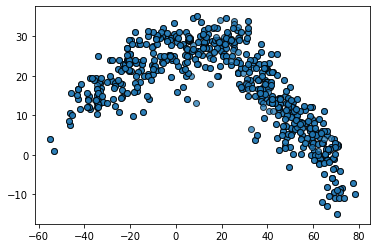

In [67]:
plt.scatter(cityWeatherpy_df["Lat"],cityWeatherpy_df["Max Temp"],marker="o",alpha=0.75,edgecolors="black")
plt.show()

#### Latitude vs. Humidity Plot

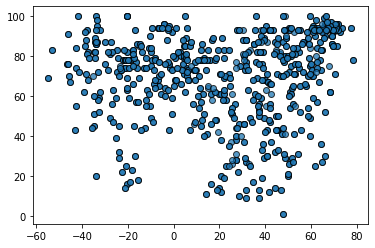

In [68]:
plt.scatter(cityWeatherpy_df["Lat"],cityWeatherpy_df["Humidity"],marker="o",alpha=0.75,edgecolors="black")
plt.show()

#### Latitude vs. Cloudiness Plot

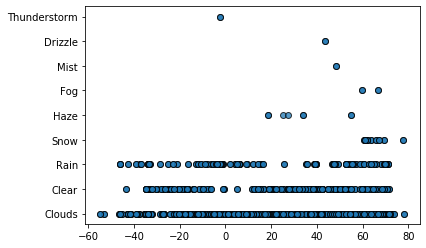

In [69]:
plt.scatter(cityWeatherpy_df["Lat"],cityWeatherpy_df["Cloud Cover"],marker="o",alpha=0.75,edgecolors="black")
plt.show()

#### Latitude vs. Wind Speed Plot

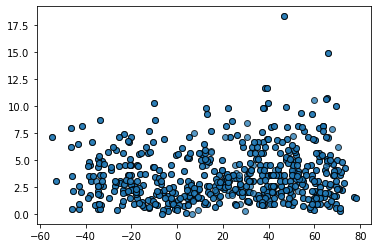

In [70]:
plt.scatter(cityWeatherpy_df["Lat"],cityWeatherpy_df["Wind Speed"],marker="o",alpha=0.75,edgecolors="black")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


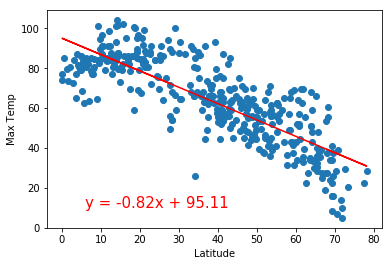

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


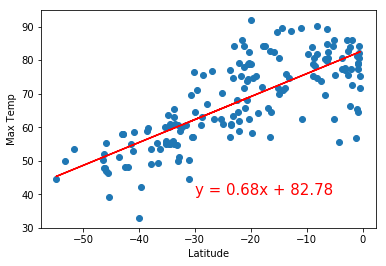

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


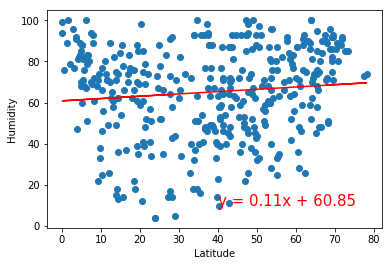

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


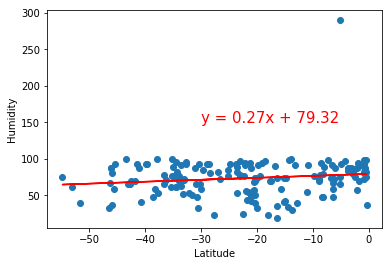

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


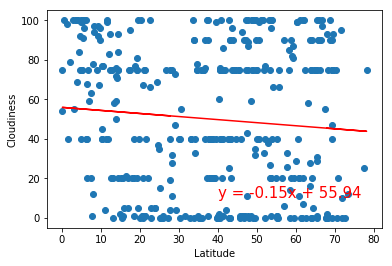

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


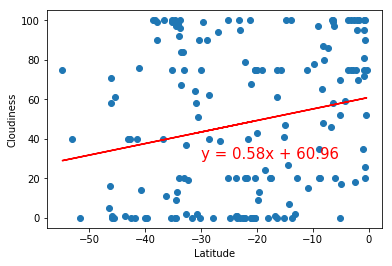

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


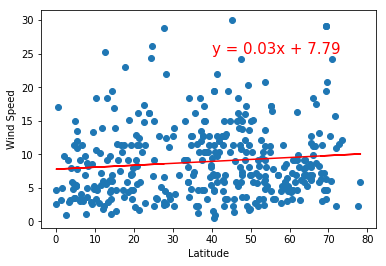

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


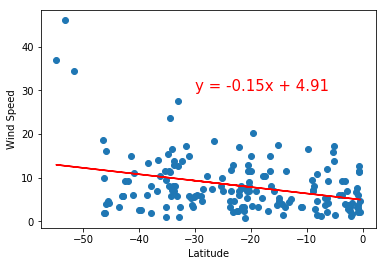